<a href="https://colab.research.google.com/github/satvik-27199/Drug_Discovery/blob/main/drug_discovery_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 636 kB 16.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
target = new_client.target
target_query = target.search('cancer')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cancer-related nucleoside-triphosphatase,14.0,False,CHEMBL4295936,"[{'accession': 'Q9BSD7', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,12.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],None,cancer cell lines,11.0,False,CHEMBL614375,[],CELL-LINE,NaN
3,"[{'xref_id': 'O14519', 'xref_name': None, 'xre...",Homo sapiens,Cyclin-dependent kinase 2-associated protein 1,11.0,False,CHEMBL5578,"[{'accession': 'O14519', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Ovarian cancer G-protein coupled receptor 1,11.0,False,CHEMBL3713916,"[{'accession': 'Q15743', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
62,[],Mus musculus,Mitogen-activated protein kinase kinase kinase 20,4.0,False,CHEMBL4523452,"[{'accession': 'Q9ESL4', 'component_descriptio...",SINGLE PROTEIN,10090.0
63,[],Homo sapiens,Aurora kinase A/Targeting protein for Xklp2,3.0,False,CHEMBL3883304,"[{'accession': 'O14965', 'component_descriptio...",PROTEIN COMPLEX,9606.0
64,[],Homo sapiens,Speckle-type POZ protein/PTEN,3.0,False,CHEMBL4523606,"[{'accession': 'P60484', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
65,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0


In [4]:
wselected_target = targets.target_chembl_id[2]
selected_target = 'CHEMBL2107'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75516,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105570,None,CHEMBL105570,None,False,http://www.openphacts.org/units/Nanomolar,197080,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1,None,82318,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105659,None,CHEMBL105659,None,False,http://www.openphacts.org/units/Nanomolar,197081,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,88387,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL321539,None,CHEMBL321539,None,False,http://www.openphacts.org/units/Nanomolar,197083,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,90262,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL104474,None,CHEMBL104474,None,False,http://www.openphacts.org/units/Nanomolar,197085,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
4,None,90269,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL319622,None,CHEMBL319622,None,False,http://www.openphacts.org/units/Nanomolar,197082,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,None,19438254,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016.0,"{'bei': '3.78', 'le': None, 'lle': None, 'sei'...",CHEMBL4461110,None,CHEMBL4461110,5.66,False,http://www.openphacts.org/units/Nanomolar,3246976,=,1,True,=,None,IC50,nM,None,2200.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,uM,UO_0000065,None,2.2
1221,None,19438255,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016

In [8]:
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75516,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105570,None,CHEMBL105570,None,False,http://www.openphacts.org/units/Nanomolar,197080,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1,None,82318,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105659,None,CHEMBL105659,None,False,http://www.openphacts.org/units/Nanomolar,197081,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,88387,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL321539,None,CHEMBL321539,None,False,http://www.openphacts.org/units/Nanomolar,197083,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,90262,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL104474,None,CHEMBL104474,None,False,http://www.openphacts.org/units/Nanomolar,197085,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
4,None,90269,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL319622,None,CHEMBL319622,None,False,http://www.openphacts.org/units/Nanomolar,197082,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,None,19438254,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016.0,"{'bei': '3.78', 'le': None, 'lle': None, 'sei'...",CHEMBL4461110,None,CHEMBL4461110,5.66,False,http://www.openphacts.org/units/Nanomolar,3246976,=,1,True,=,None,IC50,nM,None,2200.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,uM,UO_0000065,None,2.2
1221,None,19438255,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016

In [10]:
len(df2.canonical_smiles.unique())

968

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75516,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105570,None,CHEMBL105570,None,False,http://www.openphacts.org/units/Nanomolar,197080,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1,None,82318,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL105659,None,CHEMBL105659,None,False,http://www.openphacts.org/units/Nanomolar,197081,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,88387,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL321539,None,CHEMBL321539,None,False,http://www.openphacts.org/units/Nanomolar,197083,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,90262,[],CHEMBL652951,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL104474,None,CHEMBL104474,None,False,http://www.openphacts.org/units/Nanomolar,197085,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
4,None,90269,[],CHEMBL652953,Compound was evaluated for its inhibitory acti...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,None,None,CHEMBL1133867,Bioorg. Med. Chem. Lett.,2001.0,None,CHEMBL319622,None,CHEMBL319622,None,False,http://www.openphacts.org/units/Nanomolar,197082,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,None,19438254,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016.0,"{'bei': '3.78', 'le': None, 'lle': None, 'sei'...",CHEMBL4461110,None,CHEMBL4461110,5.66,False,http://www.openphacts.org/units/Nanomolar,3246976,=,1,True,=,None,IC50,nM,None,2200.0,CHEMBL2107,Homo sapiens,C-X-C chemokine receptor type 4,9606,None,None,IC50,uM,UO_0000065,None,2.2
1221,None,19438255,[],CHEMBL4430940,Binding affinity to CXCR4 (unknown origin) exp...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,None,None,CHEMBL4428122,Bioorg Med Chem,2016

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0
...,...,...,...
1220,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0
1221,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0
1222,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0
1223,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0


In [13]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

In [14]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [15]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive


In [17]:
df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)

In [18]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive


In [19]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [20]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [21]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL105570,1000.0,active,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
1,CHEMBL105659,1000.0,active,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...
2,CHEMBL321539,1000.0,active,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...
3,CHEMBL104474,1000.0,active,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...
4,CHEMBL319622,1000.0,active,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
...,...,...,...,...
963,CHEMBL4461110,2200.0,intermediate,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...
964,CHEMBL4551153,462.0,active,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...
965,CHEMBL4446733,2000.0,intermediate,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...
966,CHEMBL4645971,80000.0,inactive,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...


In [22]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-08-03 22:09:51--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   167MB/s    in 0.5s    

2021-08-03 22:09:51 (167 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [23]:
import rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [24]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [25]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,581.717,6.58170,0.0,7.0
1,536.720,6.67350,0.0,5.0
2,550.747,7.06180,0.0,5.0
3,522.693,6.49940,0.0,5.0
4,595.744,6.97000,0.0,7.0
...,...,...,...,...
963,1496.738,-5.91523,21.0,22.0
964,2313.619,-9.48446,35.0,32.0
965,1166.309,-4.48583,18.0,16.0
966,502.011,4.11980,2.0,6.0


In [26]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,581.717,6.58170,0.0,7.0
1,536.720,6.67350,0.0,5.0
2,550.747,7.06180,0.0,5.0
3,522.693,6.49940,0.0,5.0
4,595.744,6.97000,0.0,7.0
...,...,...,...,...
963,1496.738,-5.91523,21.0,22.0
964,2313.619,-9.48446,35.0,32.0
965,1166.309,-4.48583,18.0,16.0
966,502.011,4.11980,2.0,6.0


In [27]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active
...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive


In [28]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [29]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active,581.717,6.58170,0.0,7.0
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,1000.0,active,536.720,6.67350,0.0,5.0
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,1000.0,active,550.747,7.06180,0.0,5.0
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,1000.0,active,522.693,6.49940,0.0,5.0
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,1000.0,active,595.744,6.97000,0.0,7.0
...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2200.0,intermediate,1496.738,-5.91523,21.0,22.0
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,462.0,active,2313.619,-9.48446,35.0,32.0
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,2000.0,intermediate,1166.309,-4.48583,18.0,16.0
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,80000.0,inactive,502.011,4.11980,2.0,6.0


In [30]:

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [31]:
df_combined.standard_value.describe()

count       968.000000
mean       5929.646818
std       13657.360471
min           0.600000
25%          32.150000
50%         219.500000
75%        3518.750000
max      170000.000000
Name: standard_value, dtype: float64

In [32]:
-np.log10( (10**-9)* 100000000 )

1.0

In [33]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [34]:

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [35]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,1000.0
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,1000.0
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,1000.0
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,1000.0
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,1000.0
...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1496.738,-5.91523,21.0,22.0,2200.0
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,462.0
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1166.309,-4.48583,18.0,16.0,2000.0
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,80000.0


In [36]:
df_norm.standard_value_norm.describe()

count       968.000000
mean       5929.646818
std       13657.360471
min           0.600000
25%          32.150000
50%         219.500000
75%        3518.750000
max      170000.000000
Name: standard_value_norm, dtype: float64

In [37]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,6.000000
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,6.000000
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,6.000000
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,6.000000
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,6.000000
...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1496.738,-5.91523,21.0,22.0,5.657577
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,6.335358
965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1166.309,-4.48583,18.0,16.0,5.698970
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,4.096910


In [38]:
df_final.pIC50.describe()

count    968.000000
mean       6.491035
std        1.247311
min        3.769551
25%        5.453630
50%        6.658567
75%        7.492821
max        9.221849
Name: pIC50, dtype: float64

In [39]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [40]:

df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,6.000000
1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,6.000000
2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,6.000000
3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,6.000000
4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,6.000000
...,...,...,...,...,...,...,...,...
961,CHEMBL4470663,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,3024.482,-10.69206,39.0,45.0,7.638272
962,CHEMBL4443891,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2848.270,-10.75846,39.0,41.0,7.657577
964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,6.335358
966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,4.096910


In [41]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

In [42]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

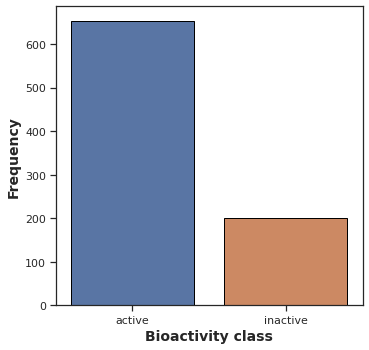

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

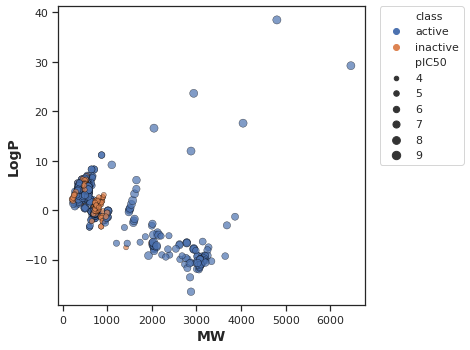

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

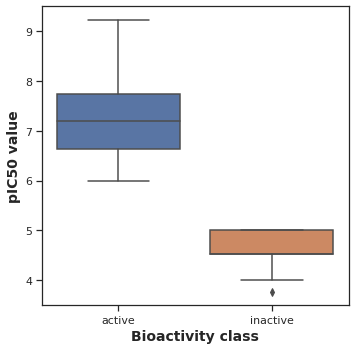

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [46]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [47]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.691123e-102,0.05,Different distribution (reject H0)


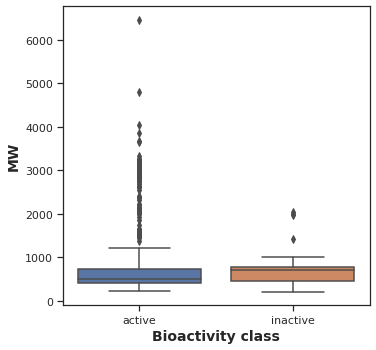

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [49]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,53895.5,0.000082,0.05,Different distribution (reject H0)


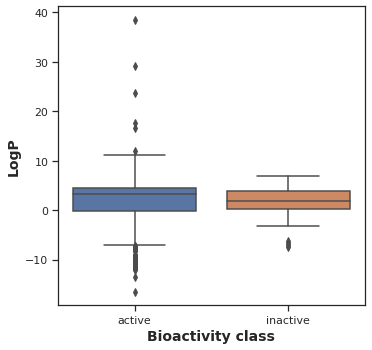

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [51]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,56716.5,0.002226,0.05,Different distribution (reject H0)


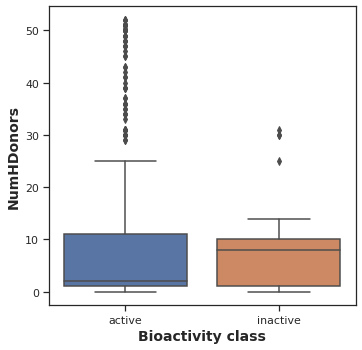

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [53]:

mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,61699.0,0.109106,0.05,Same distribution (fail to reject H0)


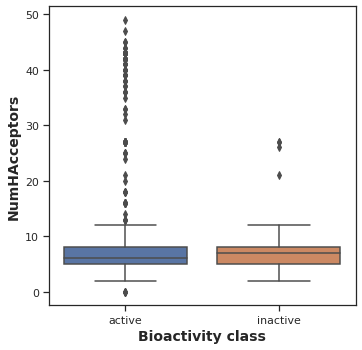

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [55]:

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,59480.0,0.025132,0.05,Different distribution (reject H0)


In [56]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [57]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.58170,0.0,7.0,6.000000
1,1,CHEMBL105659,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3cccc...,active,536.720,6.67350,0.0,5.0,6.000000
2,2,CHEMBL321539,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccc...,active,550.747,7.06180,0.0,5.0,6.000000
3,3,CHEMBL104474,C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32...,active,522.693,6.49940,0.0,5.0,6.000000
4,4,CHEMBL319622,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.744,6.97000,0.0,7.0,6.000000
...,...,...,...,...,...,...,...,...,...
963,963,CHEMBL4461110,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1496.738,-5.91523,21.0,22.0,5.657577
964,964,CHEMBL4551153,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,active,2313.619,-9.48446,35.0,32.0,6.335358
965,965,CHEMBL4446733,CC(C)C[C@@H](N)C(=O)NCC(=O)N[C@H](C)C(=O)N[C@H...,intermediate,1166.309,-4.48583,18.0,16.0,5.698970
966,966,CHEMBL4645971,COc1cc(C(=O)N[C@H]2C[C@@H]3CCC[C@H](C2)N3CC(=O...,inactive,502.011,4.11980,2.0,6.0,4.096910


In [58]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [59]:

! cat molecule.smi | head -5

C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105570
C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105659
C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2c(CC)nc3ccccc32)c2ccccc2)CC1	CHEMBL321539
C=CCN(C(=O)OCc1ccccc1)C1CCN(CCC(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL104474
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2c(CC)nc3ccccc32)c2ccccc2)CC1	CHEMBL319622


In [60]:
! cat molecule.smi | wc -l

968


In [61]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-08-03 22:12:18--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-08-03 22:12:19--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  58.2MB/s    in 0.4s    

2021-08-03 22:12:19 (58.2 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-08-03 22:12:19--  https://githu

In [62]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [63]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [64]:
! bash padel.sh

Processing CHEMBL105570 in molecule.smi (1/968). 
Processing CHEMBL105659 in molecule.smi (2/968). 
Processing CHEMBL321539 in molecule.smi (3/968). Average speed: 6.25 s/mol.
Processing CHEMBL104474 in molecule.smi (4/968). Average speed: 3.29 s/mol.
Processing CHEMBL319622 in molecule.smi (5/968). Average speed: 2.84 s/mol.
Processing CHEMBL106803 in molecule.smi (6/968). Average speed: 2.15 s/mol.
Processing CHEMBL545532 in molecule.smi (7/968). Average speed: 2.00 s/mol.
Processing CHEMBL1202230 in molecule.smi (8/968). Average speed: 2.05 s/mol.
Processing CHEMBL2311089 in molecule.smi (9/968). Average speed: 1.54 s/mol.
Processing CHEMBL545063 in molecule.smi (10/968). Average speed: 1.44 s/mol.
Processing CHEMBL541337 in molecule.smi (11/968). Average speed: 1.29 s/mol.
Processing CHEMBL553964 in molecule.smi (12/968). Average speed: 1.36 s/mol.
Processing CHEMBL543895 in molecule.smi (13/968). Average speed: 1.14 s/mol.
Processing CHEMBL538038 in molecule.smi (15/968). Average 

In [65]:
! ls -l

total 111812
-rw-r--r-- 1 root root   874771 Aug  3 22:09 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root   130798 Aug  3 22:09 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   138664 Aug  3 22:09 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   195035 Aug  3 22:11 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   175385 Aug  3 22:11 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  1732300 Aug  3 22:23 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Aug  3 22:12 __MACOSX
-rw-r--r-- 1 root root      123 Aug  3 22:11 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      120 Aug  3 22:11 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Aug  3 22:12 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      130 Aug  3 22:11 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      121 Aug  3 22:11 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 ro

In [67]:
df3_X = pd.read_csv('descriptors_output.csv')

In [68]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL105570,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL105659,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL104474,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL321539,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL106803,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,CHEMBL4461110,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
964,CHEMBL4446733,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
965,CHEMBL4645971,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,CHEMBL4634148,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
964,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
965,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
df3_Y = df3['pIC50']
df3_Y

0      6.000000
1      6.000000
2      6.000000
3      6.000000
4      6.000000
         ...   
963    5.657577
964    6.335358
965    5.698970
966    4.096910
967    4.823909
Name: pIC50, Length: 968, dtype: float64

In [71]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.657577
964,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.335358
965,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.698970
966,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.096910


In [72]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [73]:
dataset3.corr()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
PubchemFP0,1.000000,0.455248,0.306295,0.087744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007516,-0.072811,NaN,-0.002071,-0.017985,-0.077088,-0.017784,-0.032474,-0.049896,-0.100542,-0.082222,-0.314389,-0.422402,-0.893963,NaN,NaN,NaN,NaN,-0.754752,-1.000000,-1.000000,0.030260,0.026266,0.002071,NaN,0.014388,0.006581,NaN,...,0.002071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002071,NaN,NaN,0.002071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100806
PubchemFP1,0.455248,1.000000,0.672809,0.192739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016509,-0.159937,NaN,-0.004550,-0.039505,-0.169332,-0.096477,-0.127187,-0.167288,-0.275712,0.000524,-0.122499,-0.178302,-0.405358,NaN,NaN,NaN,NaN,-0.339496,-0.455248,-0.455248,-0.223799,-0.261810,0.004550,NaN,-0.038403,0.014456,NaN,...,0.004550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004550,NaN,NaN,0.004550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009037
PubchemFP2,0.306295,0.672809,1.000000,0.286469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064588,-0.165364,NaN,-0.006763,-0.019109,-0.178706,-0.155605,-0.170141,-0.207932,-0.345427,-0.210220,-0.113425,-0.140019,-0.271070,NaN,NaN,NaN,NaN,-0.224206,-0.306295,-0.306295,-0.327724,-0.310368,0.006763,NaN,-0.001245,0.021487,NaN,...,0.006763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006763,NaN,NaN,0.006763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011081
PubchemFP3,0.087744,0.192739,0.286469,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158926,0.261115,NaN,0.043804,0.146198,0.212940,0.141232,0.207030,0.157121,-0.163983,-0.238282,-0.124910,-0.062417,-0.098152,NaN,NaN,NaN,NaN,-0.039579,-0.087744,-0.087744,-0.206597,-0.202367,0.023608,NaN,-0.202466,-0.117752,NaN,...,-0.043804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043804,NaN,NaN,-0.043804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033077
PubchemFP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PubchemFP877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP878,NaN,NaN,NaN

In [75]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [76]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-08-03 22:28:34--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2021-08-03 22:28:34--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [219]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [337]:
df = pd.read_csv('new_data.csv')

In [338]:
X = df.drop('pIC50', axis=1)

In [334]:
cor_matrix = X.corr().abs()
print(cor_matrix)

              PubchemFP0  PubchemFP1  ...  PubchemFP879  PubchemFP880
PubchemFP0      1.000000    0.182009  ...           NaN           NaN
PubchemFP1      0.182009    1.000000  ...           NaN           NaN
PubchemFP2      0.043202    0.237361  ...           NaN           NaN
PubchemFP3      0.009258    0.050866  ...           NaN           NaN
PubchemFP4           NaN         NaN  ...           NaN           NaN
...                  ...         ...  ...           ...           ...
PubchemFP876         NaN         NaN  ...           NaN           NaN
PubchemFP877         NaN         NaN  ...           NaN           NaN
PubchemFP878         NaN         NaN  ...           NaN           NaN
PubchemFP879         NaN         NaN  ...           NaN           NaN
PubchemFP880         NaN         NaN  ...           NaN           NaN

[881 rows x 881 columns]


In [303]:
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
  print(upper_tri)

              PubchemFP0  PubchemFP1  ...  PubchemFP879  PubchemFP880
PubchemFP0           NaN    0.182009  ...           NaN           NaN
PubchemFP1           NaN         NaN  ...           NaN           NaN
PubchemFP2           NaN         NaN  ...           NaN           NaN
PubchemFP3           NaN         NaN  ...           NaN           NaN
PubchemFP4           NaN         NaN  ...           NaN           NaN
...                  ...         ...  ...           ...           ...
PubchemFP876         NaN         NaN  ...           NaN           NaN
PubchemFP877         NaN         NaN  ...           NaN           NaN
PubchemFP878         NaN         NaN  ...           NaN           NaN
PubchemFP879         NaN         NaN  ...           NaN           NaN
PubchemFP880         NaN         NaN  ...           NaN           NaN

[881 rows x 881 columns]


In [304]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(); print(to_drop)


['PubchemFP9', 'PubchemFP10', 'PubchemFP116', 'PubchemFP130', 'PubchemFP132', 'PubchemFP146', 'PubchemFP149', 'PubchemFP153', 'PubchemFP156', 'PubchemFP160', 'PubchemFP166', 'PubchemFP167', 'PubchemFP173', 'PubchemFP174', 'PubchemFP181', 'PubchemFP184', 'PubchemFP188', 'PubchemFP191', 'PubchemFP195', 'PubchemFP198', 'PubchemFP202', 'PubchemFP216', 'PubchemFP221', 'PubchemFP223', 'PubchemFP228', 'PubchemFP230', 'PubchemFP243', 'PubchemFP244', 'PubchemFP250', 'PubchemFP251', 'PubchemFP283', 'PubchemFP284', 'PubchemFP285', 'PubchemFP286', 'PubchemFP287', 'PubchemFP291', 'PubchemFP292', 'PubchemFP293', 'PubchemFP294', 'PubchemFP296', 'PubchemFP297', 'PubchemFP298', 'PubchemFP314', 'PubchemFP327', 'PubchemFP328', 'PubchemFP330', 'PubchemFP342', 'PubchemFP348', 'PubchemFP350', 'PubchemFP351', 'PubchemFP352', 'PubchemFP353', 'PubchemFP354', 'PubchemFP355', 'PubchemFP356', 'PubchemFP358', 'PubchemFP361', 'PubchemFP362', 'PubchemFP363', 'PubchemFP364', 'PubchemFP365', 'PubchemFP368', 'PubchemF

In [314]:
    X = X.drop(to_drop, axis=1)
    print(); print(X.head())


   PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP878  PubchemFP879  PubchemFP880
0           1           1           1  ...             0             0             0
1           1           1           1  ...             0             0             0
2           1           1           1  ...             0             0             0
3           1           1           0  ...             0             0             0
4           1           1           0  ...             0             0             0

[5 rows x 500 columns]


In [315]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [339]:
X.shape

(4695, 881)

In [340]:
Y.shape

(4695,)

In [300]:

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [318]:

X.shape

(4695, 500)

In [341]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [342]:

X_train.shape, Y_train.shape

((3756, 881), (3756,))

In [343]:

X_test.shape, Y_test.shape

((939, 881), (939,))

In [344]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5158143474551815

In [345]:
# get importance
importance = model.feature_importances_
# summarize feature importance
dic = {}
for i,v in enumerate(importance):
  dic[i] = v
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [346]:
print(dic)

{0: 6.498558222751563e-06, 1: 0.0019469197398303785, 2: 0.003775054500869317, 3: 0.030387887410700812, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 1.9747873253082583e-07, 11: 0.0005589235361794626, 12: 0.0069366730171537706, 13: 0.008441357269900794, 14: 7.781641238483013e-05, 15: 0.004774153409820578, 16: 0.005382357833459525, 17: 5.7055221088734155e-05, 18: 0.0015994935178317384, 19: 0.003897888818165534, 20: 0.004810751385202569, 21: 0.0007367011579943144, 22: 4.846294832813871e-05, 23: 0.001830853922496454, 24: 0.002227582663314839, 25: 8.534653424210973e-05, 26: 0.0, 27: 0.0, 28: 1.2608495649084207e-07, 29: 0.0, 30: 0.0003003989411879474, 31: 0.0, 32: 0.0, 33: 0.0023694768121401287, 34: 0.0009543891879548526, 35: 0.0, 36: 0.0, 37: 0.0006800708644138356, 38: 0.0010098178095651602, 39: 1.0014538955686543e-05, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.000248054915219984, 44: 2.2283911825285802e-05, 45: 0.0, 46: 2.653885616954218e-05, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.

In [347]:
sorted_dt = {key: value for key, value in sorted(dic.items(), key=lambda item: item[1])}

print(sorted_dt)

{4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 26: 0.0, 27: 0.0, 29: 0.0, 31: 0.0, 32: 0.0, 35: 0.0, 36: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 45: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103: 0.0, 104: 0.0, 105: 0.0, 106: 0.0, 107: 0.0, 108: 0.0, 109: 0.0, 110: 0.0, 111: 0.0, 112: 0.0, 113: 0.0, 114: 0.0, 117: 0.0, 119: 0.0, 120: 0.0, 121: 0.0, 122: 0.0, 123: 0.0, 124: 0.0, 125: 0.0, 126: 0.0, 127: 0.0, 128: 0.0, 133: 0.0, 134: 0.0, 135: 0.0, 136: 0.0, 137: 0.0, 138: 0.0, 139: 0.0, 140: 0.0, 141: 0.0, 142: 0.0, 158: 0.0, 161: 0.0, 162:

In [348]:
keysList = list(sorted_dt.keys())

In [349]:
len(keysList)

881

In [350]:
keysList_drop = keysList[840:]

In [351]:
drop = []
for i in keysList_drop:
  drop.append('PubchemFP' + str(i))


In [352]:
print(drop)

['PubchemFP684', 'PubchemFP143', 'PubchemFP199', 'PubchemFP638', 'PubchemFP593', 'PubchemFP673', 'PubchemFP186', 'PubchemFP737', 'PubchemFP420', 'PubchemFP697', 'PubchemFP712', 'PubchemFP181', 'PubchemFP614', 'PubchemFP12', 'PubchemFP305', 'PubchemFP643', 'PubchemFP688', 'PubchemFP346', 'PubchemFP374', 'PubchemFP696', 'PubchemFP338', 'PubchemFP813', 'PubchemFP580', 'PubchemFP390', 'PubchemFP13', 'PubchemFP672', 'PubchemFP193', 'PubchemFP180', 'PubchemFP259', 'PubchemFP750', 'PubchemFP261', 'PubchemFP391', 'PubchemFP601', 'PubchemFP308', 'PubchemFP335', 'PubchemFP821', 'PubchemFP493', 'PubchemFP559', 'PubchemFP528', 'PubchemFP758', 'PubchemFP3']


In [353]:
X_new = X.copy()
X_new = X_new[drop]

In [354]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2)

In [355]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5159905923607065

In [115]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

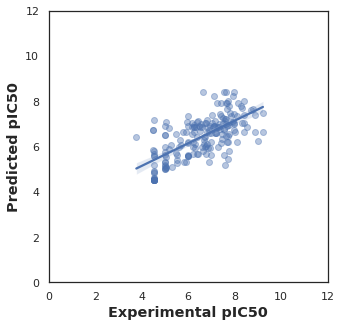

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show